In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA 
from scipy import stats
import os

from mpl_toolkits.mplot3d import Axes3D

In [2]:
raw_df = pd.read_csv("Z:/DeepLearningData/research_010_NIH3T3/shCtrl_003/data/compare_OPA1/quantification_result_shCtrl_003_shOPA1_003.csv")
raw_df

,Gene,crop_No,mito_No,Type,Unnamed: 4,mito_S_px,mito_S_nm,mito_V_px,mito_V_nm,form_factor,...,Unnamed: 149,re_extract_CJ/IMM_5px,re_extract_CJ_number/IMM_5px,re_extract_CJ_number_no_1px/IMM_50m,re_extract_CJ_number_no_1px_2px/IMM_50m,Unnamed: 154,re_extract_lamellar_CJ_number_no_1px_2px,re_extract_tubular_CJ_number_no_1px_2px,re_extract_lamellar_CJ_number_no_1px_2px/lamellar_S_nm,re_extract_tubular_CJ_number_no_1px_2px/tubular_S_nm
0,shCtrl,1,1,shCtrl_1,NaN,23629,2362900,545648,545648000,0.280602,...,NaN,0.120672,0.005258,0.000039,0.000033,NaN,36,59,0.000009914897133,0.00004756146715
1,shCtrl,1,2,shCtrl_1,NaN,18959,1895900,457678,457678000,0.206019,...,NaN,0.180637,0.004600,0.000038,0.000037,NaN,32,60,0.00001274900398,0.00004740459825
2,shCtrl,1,3,shCtrl_1,NaN,18815,1881500,449917,449917000,0.208367,...,NaN,0.078088,0.005108,0.000039,0.000032,NaN,27,46,0.00001173862006,0.00004359363154
3,shCtrl,1,4,shCtrl_1,NaN,13978,1397800,295946,295946000,0.197465,...,NaN,0.170808,0.004863,0.000040,0.000034,NaN,22,37,0.00001088193105,0.00004012144871
4,shCtrl,1,5,shCtrl_1,NaN,22635,2263500,395491,395491000,0.469514,...,NaN,0.112436,0.004874,0.000037,0.000031,NaN,39,28,0.00001072223902,0.00006592889098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,shOPA1,5,46,shOPA1_5,NaN,18273,1827300,448138,448138000,0.192392,...,NaN,0.013723,0.002179,0.000015,0.000012,NaN,29,3,0.00001842673783,0.00002461033634
455,shOPA1,5,47,shOPA1_5,NaN,9838,983800,153030,153030000,0.257482,...,NaN,0.018483,0.002411,0.000017,0.000011,NaN,11,0,0.00001133786848,0
456,shOPA1,5,48,shOPA1_5,NaN,2518,251800,19869,19869000,0.256092,...,NaN,0.000538,0.000538,0.000000,0.000000,NaN,0,0,#DIV/0!,0
457,shOPA1,5,49,shOPA1_5,NaN,20612,2061200,477734,477734000,0.242979,...,NaN,0.012693,0.000993,0.000007,0.000006,NaN,14,3,0.00000969327702,0.00004237288136


In [3]:
# 大きいMitoは除く
ctrl_df = raw_df[raw_df["Gene"] == "shCtrl"]
ctrl_pca_df = ctrl_df[["mito_S_px", "mito_V_px", "cristae_S_px", "cristae_V_px", "tubular_S/cristae_S",  "tubular_V/cristae_V", "re_extract_CJ_number_no_1px_2px/IMM_50m", "mito_max_L/mito_min_L", "form_factor"]]

ctrl_df_ = ctrl_pca_df[ctrl_pca_df["mito_V_px"] != 2883123.0]
ctrl_df_

,mito_S_px,mito_V_px,cristae_S_px,cristae_V_px,tubular_S/cristae_S,tubular_V/cristae_V,re_extract_CJ_number_no_1px_2px/IMM_50m,mito_max_L/mito_min_L,form_factor
0,23629,545648,48714,94905,0.2546495874,0.241114799,0.000033,2.087846,0.280602
1,18959,457678,37757,87658,0.3352226077,0.2664331835,0.000037,2.117981,0.206019
2,18815,449917,33553,83408,0.3144875272,0.2385862267,0.000032,2.306807,0.208367
3,13978,295946,29439,60646,0.3132579232,0.3007453088,0.000034,2.214296,0.197465
4,22635,395491,40620,90550,0.1045544067,0.07662065157,0.000031,2.587625,0.469514
...,...,...,...,...,...,...,...,...,...
130,28549,691532,53705,113172,0.1773391677,0.1820414944,0.000019,3.118330,0.308126
131,20171,442385,22504,52211,0.4421436189,0.3560360844,0.000020,4.740161,0.265559
132,31001,735405,50789,107222,0.2303845321,0.2375538602,0.000020,2.743494,0.348862
133,30988,874709,51626,126172,0.6276101189,0.652347589,0.000015,1.818400,0.246283


In [4]:
kd_df = raw_df[raw_df["Gene"] == "shOPA1"]
kd_df_ = kd_df[["mito_S_px", "mito_V_px", "cristae_S_px", "cristae_V_px", "tubular_S/cristae_S",  "tubular_V/cristae_V", "re_extract_CJ_number_no_1px_2px/IMM_50m", "mito_max_L/mito_min_L", "form_factor"]]
kd_df_ = kd_df_[kd_df_["tubular_V/cristae_V"] != '#DIV/0!']
kd_df_

,mito_S_px,mito_V_px,cristae_S_px,cristae_V_px,tubular_S/cristae_S,tubular_V/cristae_V,re_extract_CJ_number_no_1px_2px/IMM_50m,mito_max_L/mito_min_L,form_factor
135,7523,89455,7116,15447,0.542861158,0.452450314,0.000028,2.518984,0.336934
136,19524,326417,37433,100163,0.2032965565,0.1213821471,0.000026,3.186325,0.442325
137,12344,240913,14473,41843,0.3696538382,0.2012045025,0.000016,3.668488,0.205224
138,20475,304312,26222,57865,0.2998627107,0.2974336818,0.000018,2.886735,0.586967
139,21936,296227,24311,51078,0.3089136605,0.3413406946,0.000009,3.366087,0.761734
...,...,...,...,...,...,...,...,...,...
453,4445,40400,1523,2519,0.02560735391,0.01905518063,0.000011,1.563994,0.340748
454,18273,448138,16957,38885,0.07188771599,0.06285199949,0.000012,3.123570,0.192392
455,9838,153030,9892,19442,0.01920744036,0.01537907623,0.000011,1.777321,0.257482
456,2518,19869,71,101,1,1,0.000000,1.388169,0.256092


# PCA

In [5]:
scaler = MinMaxScaler()
scaler.fit(ctrl_df_)
scaled_ctrl_df = scaler.transform(ctrl_df_)
scaled_ctrl_df

array([[0.32336136, 0.39682123, 0.41359086, ..., 0.65260735, 0.02475723,
        0.08818815],
       [0.24274543, 0.32559813, 0.31894549, ..., 0.72693428, 0.02581623,
        0.03336515],
       [0.24025963, 0.3193146 , 0.28263179, ..., 0.62519849, 0.03245184,
        0.03509105],
       ...,
       [0.45062059, 0.55045408, 0.43151448, ..., 0.39919546, 0.04779757,
        0.13836308],
       [0.45039617, 0.6632387 , 0.4387444 , ..., 0.28496013, 0.01528857,
        0.06296134],
       [0.3468729 , 0.4901796 , 0.41522342, ..., 0.38888866, 0.05086835,
        0.04823433]])

In [6]:
km = KMeans(
    n_clusters=3,
    random_state=0
)
ctrl_km = km.fit_predict(scaled_ctrl_df)

In [7]:
pca = PCA(random_state=0)
pca.fit(scaled_ctrl_df)
feature_ctrl = pca.transform(scaled_ctrl_df)

In [8]:
scaled_kd_df = scaler.transform(kd_df_)
scaled_kd_df

array([[ 4.53313539e-02,  2.74739643e-02,  5.42718690e-02, ...,
         5.43446624e-01,  3.99080061e-02,  1.29594673e-01],
       [ 2.52498748e-01,  2.19325368e-01,  3.16146810e-01, ...,
         5.19342942e-01,  6.33592449e-02,  2.07062843e-01],
       [ 1.28553919e-01,  1.50098815e-01,  1.17820833e-01, ...,
         3.03095347e-01,  8.03030956e-02,  3.27808442e-02],
       ...,
       [ 8.52940669e-02,  7.89461540e-02,  7.82506543e-02, ...,
         2.09658961e-01,  1.38449755e-02,  7.11938144e-02],
       [-4.10675137e-02, -2.88649077e-02, -6.58207292e-03, ...,
        -1.37843341e-02,  1.69691676e-04,  7.01715335e-02],
       [ 2.71280360e-01,  3.41836061e-01,  1.23677323e-01, ...,
         1.12693778e-01,  7.20588683e-02,  6.05328702e-02]])

In [9]:
feature_kd = pca.transform(scaled_kd_df)

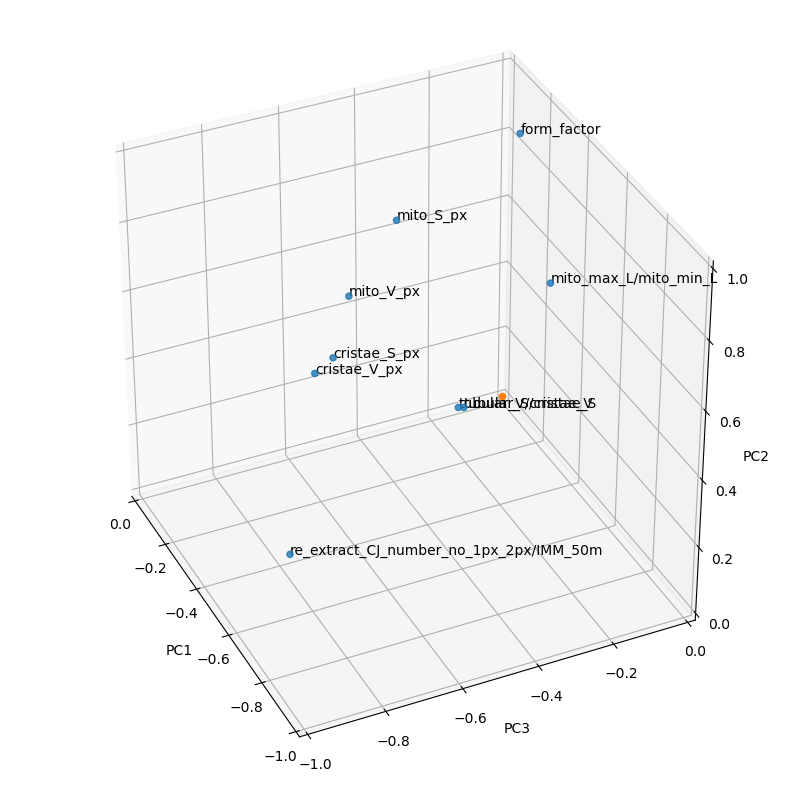

In [10]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='3d')

for x, y, z, name in zip(pca.components_[0], pca.components_[2], pca.components_[1], ctrl_df_.columns):
    ax.text(x, y, z, name)
    
ax.scatter(pca.components_[0], pca.components_[2], pca.components_[1], alpha=0.8)
ax.grid()
ax.view_init(azim=-25, elev= 35)

ax.set_xlabel("PC1")
ax.set_ylabel("PC3")
ax.set_zlabel("PC2")

ax.set_xlim([0, -1.0])
ax.set_ylim([-1.0, 0])
ax.set_zlim([0, 1.0])

ax.scatter(0, 0, 0)


plt.savefig("Z:/paper_data/2021_cristae/for_revision_#2/fig6C/PCA_orientation.svg", format="svg")

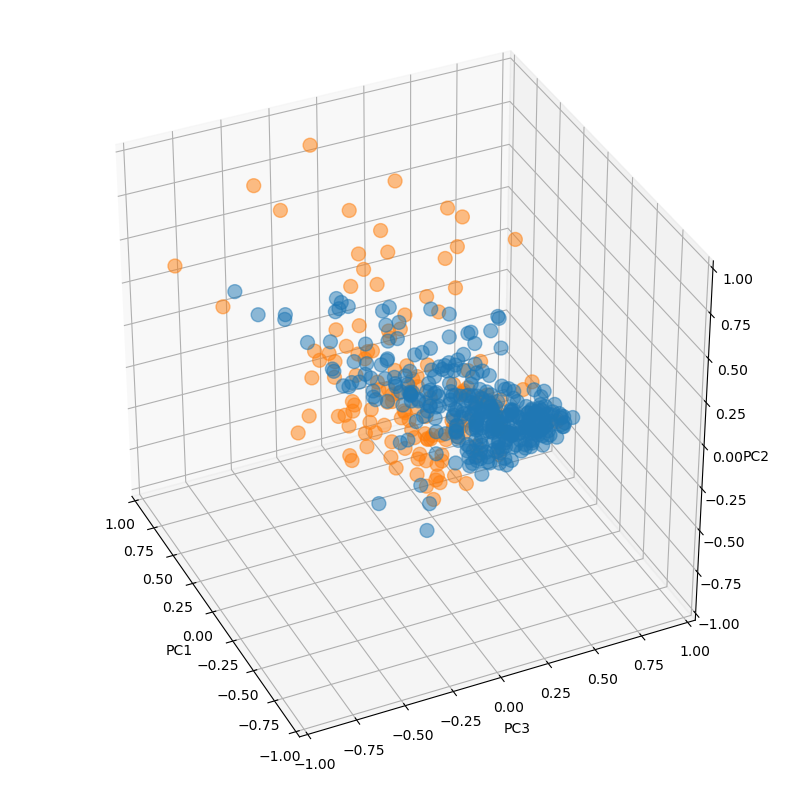

In [11]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='3d')

ax.scatter(feature_kd[:, 0] , feature_kd[:, 2], feature_kd[:, 1], alpha=0.5, s=100)
ax.scatter(feature_ctrl[:, 0] , feature_ctrl[:, 2], feature_ctrl[:, 1], alpha=0.5, s=100)

ax.set_xlabel("PC1")
ax.set_ylabel("PC3")
ax.set_zlabel("PC2")

ax.view_init(azim=-25, elev= 35)

ax.set_xlim([1.0, -1.0])
ax.set_ylim([-1.0, 1.0])
ax.set_zlim([-1.0, 1.0])

plt.savefig("Z:/paper_data/2021_cristae/for_revision_#2/fig6C/PCA_3d.svg", format="svg")

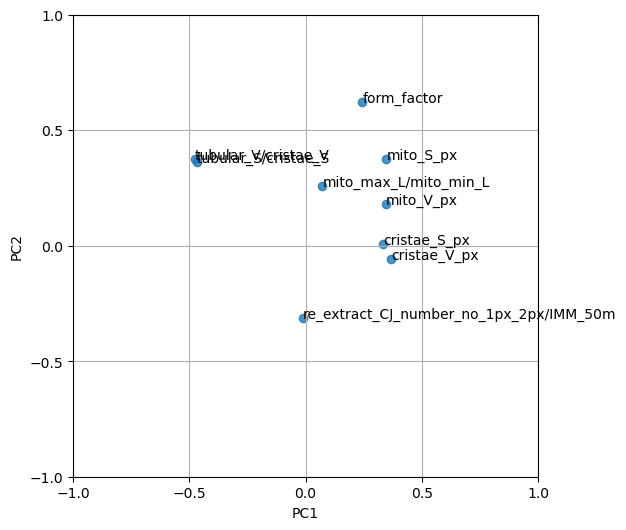

In [12]:
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], ctrl_df_.columns):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.xticks([-1.0,  -0.5, -0.0, 0.5, 1.0])
plt.yticks([-1.0,  -0.5, -0.0, 0.5, 1.0])

plt.savefig("Z:/paper_data/2021_cristae/for_revision_#2/fig6C/PCA_orientation_12.svg", format="svg")
plt.show()

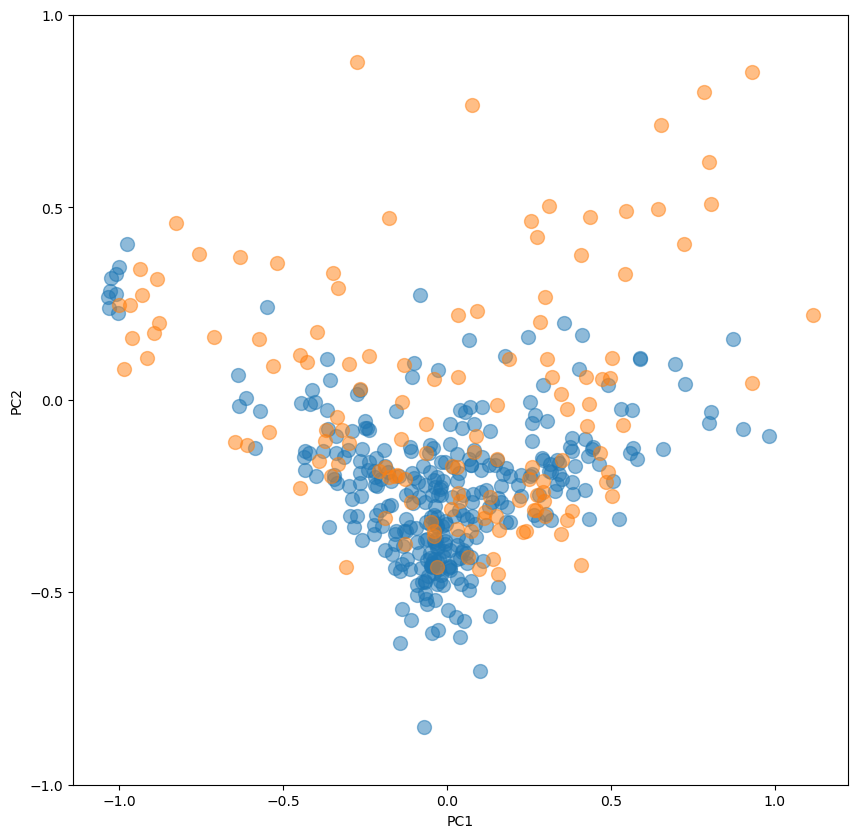

In [13]:
plt.figure(figsize=(10, 10))

plt.scatter(feature_kd[:, 0] , feature_kd[:, 1], alpha=0.5, s=100)
plt.scatter(feature_ctrl[:, 0] , feature_ctrl[:, 1], alpha=0.5, s=100)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.xticks([-1.0,  -0.5, -0.0, 0.5, 1.0])
plt.yticks([-1.0,  -0.5, -0.0, 0.5, 1.0])

ax.view_init(azim=45, elev= 45)
plt.savefig("Z:/paper_data/2021_cristae/for_revision_#2/fig6C/PCA_12.svg", format="svg")

# Ward's

In [14]:
ctrl_df_["Gene"] = "shCtrl"
kd_df_["Gene"] = "shOPA1"

all_df_ = pd.concat([ctrl_df_, kd_df_])
all_df_

C:\Users\Neurobiology\Anaconda3\envs\philow_data_manuscript\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,mito_S_px,mito_V_px,cristae_S_px,cristae_V_px,tubular_S/cristae_S,tubular_V/cristae_V,re_extract_CJ_number_no_1px_2px/IMM_50m,mito_max_L/mito_min_L,form_factor,Gene
0,23629,545648,48714,94905,0.2546495874,0.241114799,0.000033,2.087846,0.280602,shCtrl
1,18959,457678,37757,87658,0.3352226077,0.2664331835,0.000037,2.117981,0.206019,shCtrl
2,18815,449917,33553,83408,0.3144875272,0.2385862267,0.000032,2.306807,0.208367,shCtrl
3,13978,295946,29439,60646,0.3132579232,0.3007453088,0.000034,2.214296,0.197465,shCtrl
4,22635,395491,40620,90550,0.1045544067,0.07662065157,0.000031,2.587625,0.469514,shCtrl
...,...,...,...,...,...,...,...,...,...,...
453,4445,40400,1523,2519,0.02560735391,0.01905518063,0.000011,1.563994,0.340748,shOPA1
454,18273,448138,16957,38885,0.07188771599,0.06285199949,0.000012,3.123570,0.192392,shOPA1
455,9838,153030,9892,19442,0.01920744036,0.01537907623,0.000011,1.777321,0.257482,shOPA1
456,2518,19869,71,101,1,1,0.000000,1.388169,0.256092,shOPA1


In [15]:
all_df_[["mito_S_px", "mito_V_px", "cristae_S_px", "cristae_V_px", "tubular_S/cristae_S",  "tubular_V/cristae_V", "re_extract_CJ_number_no_1px_2px/IMM_50m", "mito_max_L/mito_min_L", "form_factor"]]


,mito_S_px,mito_V_px,cristae_S_px,cristae_V_px,tubular_S/cristae_S,tubular_V/cristae_V,re_extract_CJ_number_no_1px_2px/IMM_50m,mito_max_L/mito_min_L,form_factor
0,23629,545648,48714,94905,0.2546495874,0.241114799,0.000033,2.087846,0.280602
1,18959,457678,37757,87658,0.3352226077,0.2664331835,0.000037,2.117981,0.206019
2,18815,449917,33553,83408,0.3144875272,0.2385862267,0.000032,2.306807,0.208367
3,13978,295946,29439,60646,0.3132579232,0.3007453088,0.000034,2.214296,0.197465
4,22635,395491,40620,90550,0.1045544067,0.07662065157,0.000031,2.587625,0.469514
...,...,...,...,...,...,...,...,...,...
453,4445,40400,1523,2519,0.02560735391,0.01905518063,0.000011,1.563994,0.340748
454,18273,448138,16957,38885,0.07188771599,0.06285199949,0.000012,3.123570,0.192392
455,9838,153030,9892,19442,0.01920744036,0.01537907623,0.000011,1.777321,0.257482
456,2518,19869,71,101,1,1,0.000000,1.388169,0.256092


In [16]:
# standardize

scaler_= StandardScaler()
scaler_.fit(
    all_df_[["mito_S_px", "mito_V_px", "cristae_S_px", "cristae_V_px", "tubular_S/cristae_S",  "tubular_V/cristae_V", "re_extract_CJ_number_no_1px_2px/IMM_50m", "mito_max_L/mito_min_L", "form_factor"]]
)

scaled_df_ = scaler_.transform(
    all_df_[["mito_S_px", "mito_V_px", "cristae_S_px", "cristae_V_px", "tubular_S/cristae_S",  "tubular_V/cristae_V", "re_extract_CJ_number_no_1px_2px/IMM_50m", "mito_max_L/mito_min_L", "form_factor"]]
)


In [17]:
scaled_df_indexed = pd.DataFrame(
    scaled_df_, 
    columns=all_df_[["mito_S_px", "mito_V_px", "cristae_S_px", "cristae_V_px", "tubular_S/cristae_S",  "tubular_V/cristae_V", "re_extract_CJ_number_no_1px_2px/IMM_50m", "mito_max_L/mito_min_L", "form_factor"]].columns)
scaled_df_indexed

,mito_S_px,mito_V_px,cristae_S_px,cristae_V_px,tubular_S/cristae_S,tubular_V/cristae_V,re_extract_CJ_number_no_1px_2px/IMM_50m,mito_max_L/mito_min_L,form_factor
0,0.706926,1.004199,1.378290,1.038774,-0.187046,-0.132850,1.439647,-0.245320,-0.307558
1,0.244665,0.625622,0.811759,0.875942,0.164394,-0.023153,1.790956,-0.232773,-0.661523
2,0.230411,0.592222,0.594391,0.780449,0.073953,-0.143806,1.310098,-0.154158,-0.650380
3,-0.248380,-0.070389,0.381677,0.269013,0.068589,0.125513,1.577709,-0.192674,-0.702117
4,0.608535,0.358001,0.959790,0.940922,-0.841726,-0.845559,1.229816,-0.037244,0.588996
...,...,...,...,...,...,...,...,...,...
450,-1.192006,-1.170126,-1.061718,-1.037034,-1.186074,-1.094975,-0.619624,-0.463418,-0.022115
451,0.176761,0.584566,-0.263704,-0.219932,-0.984210,-0.905215,-0.540925,0.185889,-0.726195
452,-0.658179,-0.685425,-0.629000,-0.656794,-1.213989,-1.110902,-0.653965,-0.374602,-0.417282
453,-1.382751,-1.258481,-1.136794,-1.091364,3.063996,3.155195,-1.710078,-0.536620,-0.423882


In [18]:
lut = dict(zip(all_df_['Gene'].unique(), ["#ff7f0e", "#1f77b4"]))
lut

{'shCtrl': '#ff7f0e', 'shOPA1': '#1f77b4'}

In [19]:
row_colors = all_df_['Gene'].map(lut)
row_colors

0      #ff7f0e
1      #ff7f0e
2      #ff7f0e
3      #ff7f0e
4      #ff7f0e
        ...   
453    #1f77b4
454    #1f77b4
455    #1f77b4
456    #1f77b4
457    #1f77b4
Name: Gene, Length: 455, dtype: object

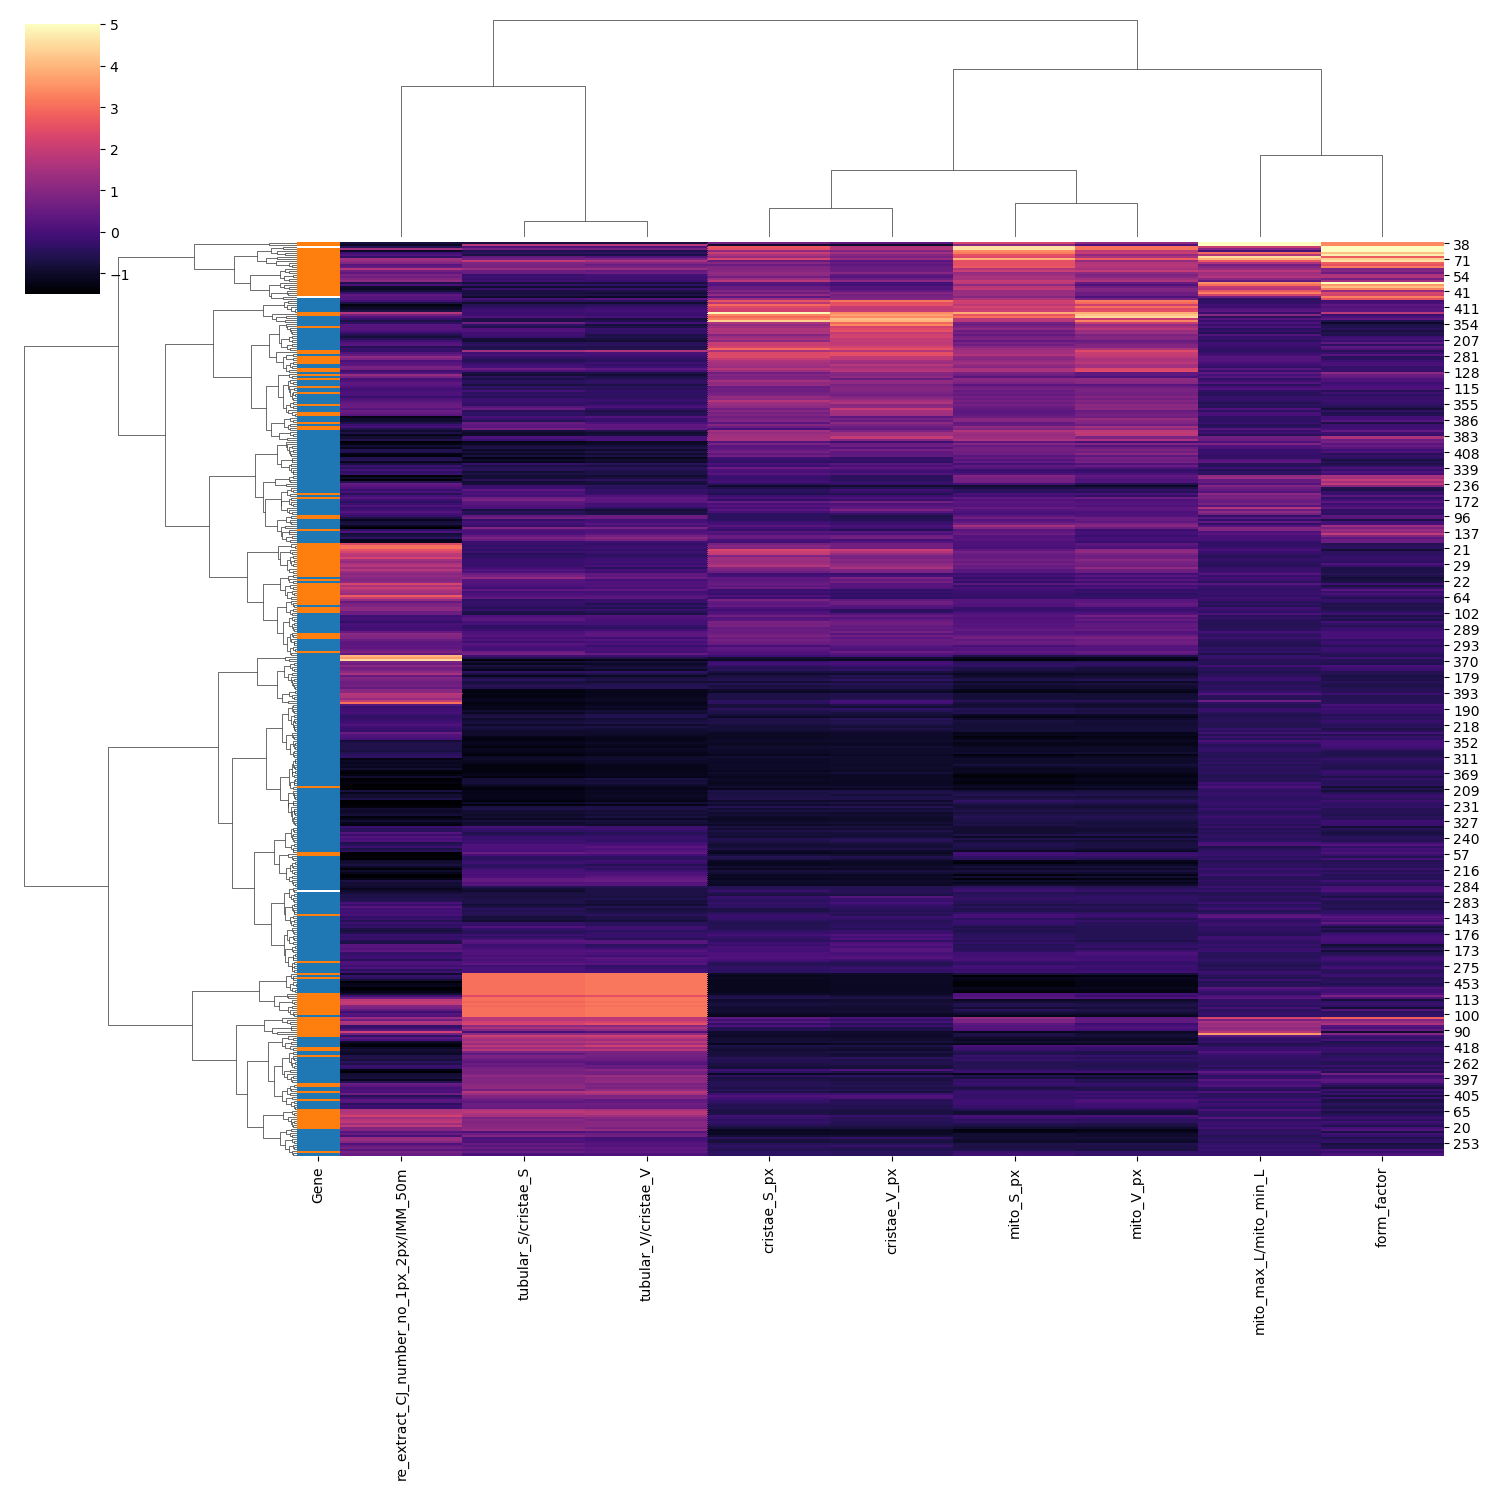

In [20]:
sns_plot = sns.clustermap(
    scaled_df_indexed, 
    method='ward', 
    metric='euclidean', 
    figsize=(15,15), 
    cmap='magma', 
    row_colors=row_colors,
    vmin=-1.5,
    vmax=5
)

plt.savefig("Z:/paper_data/2021_cristae/for_revision_#2/fig6E/heatmap_without_angle.svg", format="svg")